In [3]:
import pandas as pd

# Read in track metadata with genre labels
data = pd.read_csv('fma-rock-vs-hiphop.csv')
# Read in track metrics with the features
echonestMetrics = pd.read_json('echonest-metrics.json', precise_float = True)
data.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
echonestMetrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [5]:
echo_tracks = pd.merge(left = data[['track_id', 'genre_top']], right=echonestMetrics, on='track_id')

echo_tracks.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [6]:
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   genre_top         4802 non-null   object 
 2   acousticness      4802 non-null   float64
 3   danceability      4802 non-null   float64
 4   energy            4802 non-null   float64
 5   instrumentalness  4802 non-null   float64
 6   liveness          4802 non-null   float64
 7   speechiness       4802 non-null   float64
 8   tempo             4802 non-null   float64
 9   valence           4802 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

custom_cmap = plt.colormaps.get_cmap('magma')

numeric_data = echo_tracks.select_dtypes(include=[np.number])

corr_metrics = numeric_data.corr()

styled_corr = corr_metrics.style.background_gradient(cmap=custom_cmap)

styled_corr

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [13]:
features = echo_tracks.drop(['genre_top', 'track_id'], axis = 1)

labels = echo_tracks['genre_top']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_train_features)
variance = pca.explained_variance_ratio_
print(variance)

[0.24297674 0.18044316 0.13650309 0.12994089 0.11056248 0.08302245
 0.06923783 0.04731336]


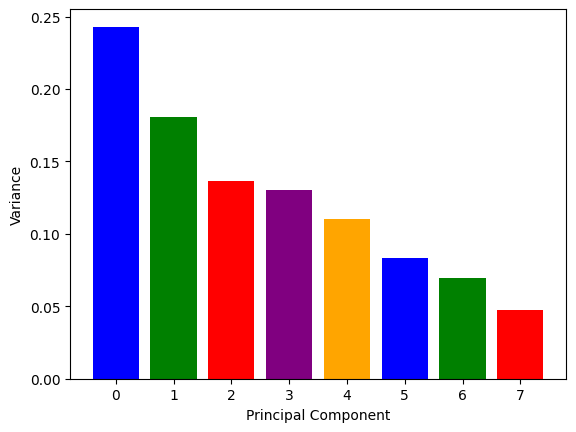

In [16]:
import matplotlib.pyplot as plt

custom_colors = ['blue', 'green', 'red', 'purple', 'orange']

fig, ax = plt.subplots()

ax.bar(range(pca.n_components_), variance, color=custom_colors)

ax.set_facecolor('white')

ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance')

plt.show()

In [18]:
import numpy as np

cum_exp_variance = np.cumsum(variance)
print(cum_exp_variance)

[0.24297674 0.4234199  0.55992299 0.68986388 0.80042636 0.88344881
 0.95268664 1.        ]


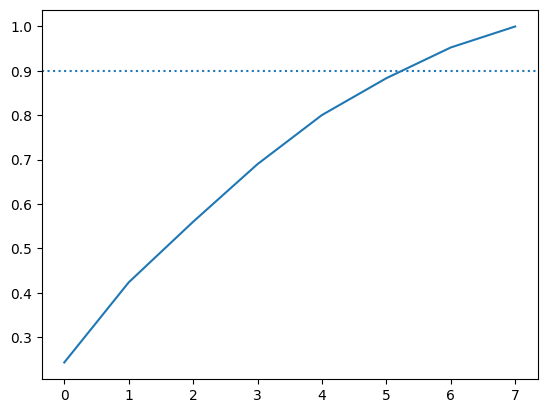

In [19]:
fig, ax = plt.subplots()
ax.plot(range(8),cum_exp_variance)
ax.axhline(y=0.9, linestyle=':',label='dashdot')
plt.show()

In [21]:
n_components = 7

pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

print(pca_projection.shape)

(4802, 7)


In [22]:
from sklearn.model_selection import train_test_split


train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, stratify = labels)


from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 10)
tree.fit(train_features, train_labels)


pred_labels_tree = tree.predict(test_features)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred_labels_tree)

0.8825978351373855

In [24]:
labels.value_counts()

genre_top
Rock       3892
Hip-Hop     910
Name: count, dtype: int64

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, pred_labels_tree)

array([[153,  75],
       [ 66, 907]], dtype=int64)

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

from sklearn.metrics import classification_report
rep_tree = classification_report(test_labels, pred_labels_tree)
rep_log = classification_report(test_labels, pred_labels_logit)

print("Decision Tree: \n", rep_tree)
print("Logistic Regression: \n", rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.70      0.67      0.68       228
        Rock       0.92      0.93      0.93       973

    accuracy                           0.88      1201
   macro avg       0.81      0.80      0.81      1201
weighted avg       0.88      0.88      0.88      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.81      0.56      0.66       228
        Rock       0.90      0.97      0.94       973

    accuracy                           0.89      1201
   macro avg       0.86      0.77      0.80      1201
weighted avg       0.89      0.89      0.88      1201



In [28]:
hop = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']
rock = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock']
rock.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [29]:
rock.shape, hop.shape

((3892, 10), (910, 10))

In [30]:
rock = rock.sample(n= hop.shape[0])
rock.shape, hop.shape

((910, 10), (910, 10))

In [31]:
rock_hop_bal = pd.concat([rock, hop])
rock_hop_bal.shape

(1820, 10)

In [32]:
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']
pca_projection = pca.fit_transform(scaler.fit_transform(features))

train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,labels,stratify = labels,random_state=10)

In [33]:
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)

logreg = LogisticRegression(random_state = 10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.78      0.78      0.78       227
        Rock       0.78      0.78      0.78       228

    accuracy                           0.78       455
   macro avg       0.78      0.78      0.78       455
weighted avg       0.78      0.78      0.78       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.85      0.80      0.82       227
        Rock       0.81      0.86      0.83       228

    accuracy                           0.83       455
   macro avg       0.83      0.83      0.83       455
weighted avg       0.83      0.83      0.83       455



In [34]:
from sklearn.model_selection import KFold, cross_val_score

# Set up our K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True,random_state=10)

tree = DecisionTreeClassifier(random_state=10)
logreg = LogisticRegression(random_state=10)

# Train our models using KFold cv
tree_score = cross_val_score(tree, pca_projection, labels, cv = kf)
logit_score = cross_val_score(logreg, pca_projection, labels, cv = kf)

# Print the mean of each array of scores
print("Decision Tree:", np.mean(tree_score),
      "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.8104395604395604 Logistic Regression: 0.8445054945054944
